<center><h1 style="font-size:35px; font-family: 'Times New Roman'; letter-spacing: 0.1em;">  Spam E-Mail Detection 📧 </h1></center>

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score , classification_report , ConfusionMatrixDisplay , confusion_matrix
from sklearn.pipeline import Pipeline
import joblib

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Loading the Data</h1>

In [32]:
df = pd.read_csv("sms_data.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">EDA</h1>

In [33]:
df.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [34]:
df.shape

(5572, 2)

In [35]:
df.size

11144

In [36]:
df.Category.value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

<Axes: xlabel='Category', ylabel='count'>

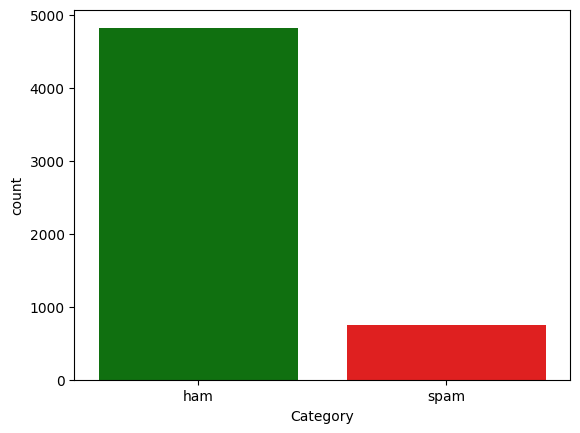

In [37]:
sns.countplot(x='Category', data=df ,palette=['g','r'])

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Null Values</h1>

In [38]:
missing_data = pd.DataFrame({'total_missing': df.isnull().sum(), 'perc_missing': (df.isnull().sum()/5572)*100})
missing_data

,total_missing,perc_missing
Category,0,0.0
Message,0,0.0


<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Feature Engineering</h1>

In [39]:
df['spam']=df['Category'].apply(lambda x: 1 if x=='spam' else 0)
df.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [40]:
X_train, X_test, y_train, y_test = train_test_split(df.Message,df.spam)
print(X_test.shape)
print(X_train.shape)

(1393,)
(4179,)


In [41]:
X_train[:4]

2802                        Depends on where u going lor.
3453                             Ugh just got outta class
2162    Is she replying. Has boye changed his phone nu...
482     Yo carlos, a few friends are already asking me...
Name: Message, dtype: object

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Bag-of-Words Representation</h1>


In [42]:
cv = CountVectorizer(ngram_range=(1, 1))
X_train_count = cv.fit_transform(X_train.values)
X_train_count.toarray()[:2]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

if you want to try TF-IDF Vectorizer

feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english', lowercase=True)   
X_train_features = feature_extraction.fit_transform(X_train)    
X_test_features = feature_extraction.transform(X_test)    
Y_train = Y_train.astype('int')    
Y_test = Y_test.astype('int')

In [43]:
X_train_count.shape

(4179, 7487)

In [44]:
# Show Vocabulary
cv.get_feature_names_out()[1000:1500]

array(['approx', 'apps', 'appt', 'appy', 'april', 'aproach', 'apt',
       'aptitude', 'ar', 'arab', 'arabian', 'arcade', 'archive', 'ard',
       'are', 'area', 'aren', 'arent', 'arestaurant', 'aretaking',
       'areyouunique', 'argh', 'argue', 'arguing', 'argument',
       'arguments', 'aries', 'arises', 'arithmetic', 'arm', 'armand',
       'armenia', 'arms', 'arng', 'arngd', 'arnt', 'around', 'arr',
       'arrange', 'arranging', 'arrested', 'arrival', 'arrive', 'arrived',
       'arrow', 'arsenal', 'art', 'artists', 'arts', 'arty', 'arul',
       'arun', 'as', 'asa', 'asap', 'asda', 'asia', 'asian', 'asjesus',
       'ask', 'askd', 'asked', 'askin', 'asking', 'asks', 'asleep', 'asp',
       'aspects', 'ass', 'assessment', 'asshole', 'assistance',
       'associate', 'asssssholeeee', 'assume', 'assumed', 'asthere',
       'asthma', 'astne', 'astoundingly', 'astronomer', 'asus', 'asusual',
       'at', 'ate', 'athletic', 'athome', 'atlanta', 'atleast', 'atm',
       'atrocious', 'a

In [45]:
cv.get_feature_names_out()[1500] 

'buddys'

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Navie Bayes Model</h1>

In [46]:
model = MultinomialNB()
model.fit(X_train_count,y_train)
X_test_count = cv.transform(X_test)

y_pred = model.predict(X_test_count)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1191
           1       0.98      0.94      0.96       202

    accuracy                           0.99      1393
   macro avg       0.99      0.97      0.98      1393
weighted avg       0.99      0.99      0.99      1393



<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Evaluate Performance</h1>

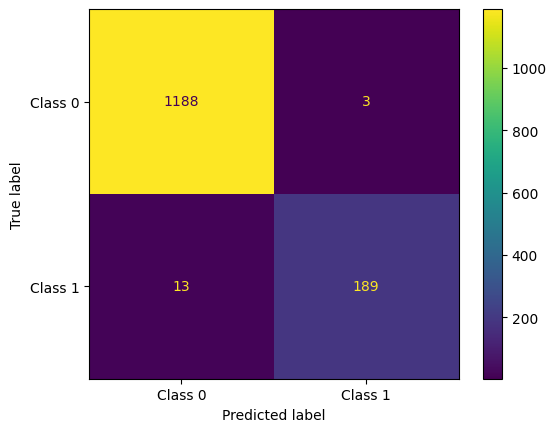

In [48]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
disp.plot()
plt.show()

In [50]:
NaiveBayes = MultinomialNB()

X_train_count = cv.fit_transform(X_train.values)
NaiveBayes.fit(X_train_count, y_train)
prediction_on_training_data = NaiveBayes.predict(X_train_count)
accuracy_on_training_data = accuracy_score(y_train, prediction_on_training_data)
print('Accuracy on train data : ', accuracy_on_training_data)

print("-"*50)

prediction_on_test_data = NaiveBayes.predict(cv.transform(X_test.values)) 
accuracy_on_test_data = accuracy_score(y_test, prediction_on_test_data)
print('Accuracy on test data(overall) : : ', accuracy_on_test_data)

Accuracy on train data :  0.9932998324958124
--------------------------------------------------
Accuracy on test data(overall) : :  0.9885139985642498


<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Make Prediction</h1>

In [51]:
emails = [
    'Hey mohamd, can we get together to watch footbal game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!']

emails_count = cv.transform(emails)
model.predict(emails_count)

array([0, 1], dtype=int64)

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Sklearn Pipeline</h1>

In [52]:
clf = Pipeline([
    ('vectorizer', CountVectorizer(ngram_range=(1, 1))),
    ('nb', MultinomialNB())
])


clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

0.9885139985642498


In [53]:
clf.predict(emails)

array([0, 1], dtype=int64)

In [54]:
joblib.dump(clf, 'spam_classifier.pkl')

['spam_classifier.pkl']